In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

# FIXED PERCENTAGE

In [100]:
def histogramas(
        datasets=['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist'],
        models=['ae', 'tae', 'convae', 'convtae', 'umap'],
        markers = ['d', 's', 'p', 'h', 'o'],
        percentages=[25, 50, 75, 100, 200],
        colors = ['blue', 'orange', 'lightgreen', 'darkgreen', 'purple'],
        y_lim = [0, 1]
        ):
    """
    Plots the best accuracy for each model and dataset for a fixed percentage of the dataset.
    """
    for dataset in datasets:
        with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
            no_reducer_score = yaml.load(f, Loader=yaml.FullLoader)
            no_reducer_score = no_reducer_score['score']
        # Subplots for each dataset
        fig, axs = plt.subplots(len(models), len(percentages), figsize=(3*len(models), 3.5*len(percentages)))
        fig.subplots_adjust(top=0.85)
        # Set tight layout
        
        plt.suptitle(f'Analysis on {dataset}')
        for percentage_index, percentage in enumerate(percentages):
            axs[0][percentage_index].set_title(f'{percentage}%')
        for model_index, model in enumerate(models):
            axs[model_index][0].set_ylabel(model)
        # axs[0][0].set_title('25%')
        # axs[0][1].set_title('50%')
        # axs[0][2].set_title('75%')
        # axs[0][3].set_title('100%')
        # axs[0][4].set_title('200%')


        for percentage_index, percentage in enumerate(percentages):
            max_length = 0
            models_data = []
            for model_index, model in enumerate(models):
                experiment_name = f'P10_{model}_{dataset}_p{percentage}'
                if model == 'umap':
                    experiment_name = experiment_name[4:]
                # print(i, j, experiment_name)
                try:
                    data = pd.read_csv(f'../experiments/{experiment_name}/data.csv')
                    data = data.loc[data['score'] > 0]
                except:
                    data = pd.DataFrame({'Unnamed: 0': [], 'score': []})
                max_index = data['Unnamed: 0'].max()
                if  max_index > max_length:
                    max_length = max_index
                # models_data.append(data['score'])
                # print(percentage_index, model_index, experiment_name)
                axs[model_index][percentage_index].hist(
                    data['score'],
                    bins=5,
                    color=colors[model_index],
                    edgecolor=colors[model_index],
                    linewidth=1, alpha=0.5,
                    label=models)
                # axs[0].plot(data['Unnamed: 0'], data['score'], markers[j], color=colors[j], markersize=4, label=model)
                # axs[1].plot(data['score'].cummax(), color=colors[j], linewidth=2, label=model)
            # axs[0].plot([0, max_length], [no_reducer_score, no_reducer_score], color='red', linewidth=2, label='No reducer')
            # axs[0].legend(loc='lower center')
            # axs[0].set_ylabel(f'Best accuracy')
            # axs[0].set_xlabel('Iterations')
            # axs[0].grid()
            # axs[0].set_ylim(y_lim)
            # axs[0].set_facecolor('#e6f5c9')
            # axs[1].plot([0, max_length], [no_reducer_score, no_reducer_score], color='red', linewidth=2, label='No reducer')
            # axs[1].legend(loc='lower center')
            # axs[1].set_ylabel(f'Best accuracy')
            # axs[1].set_xlabel('Iterations')
            # axs[1].grid()
            # axs[1].set_ylim(y_lim)
            # axs[1].set_facecolor('#e6f5c9')
        plt.tight_layout()
        plt.show()

## DATASETS

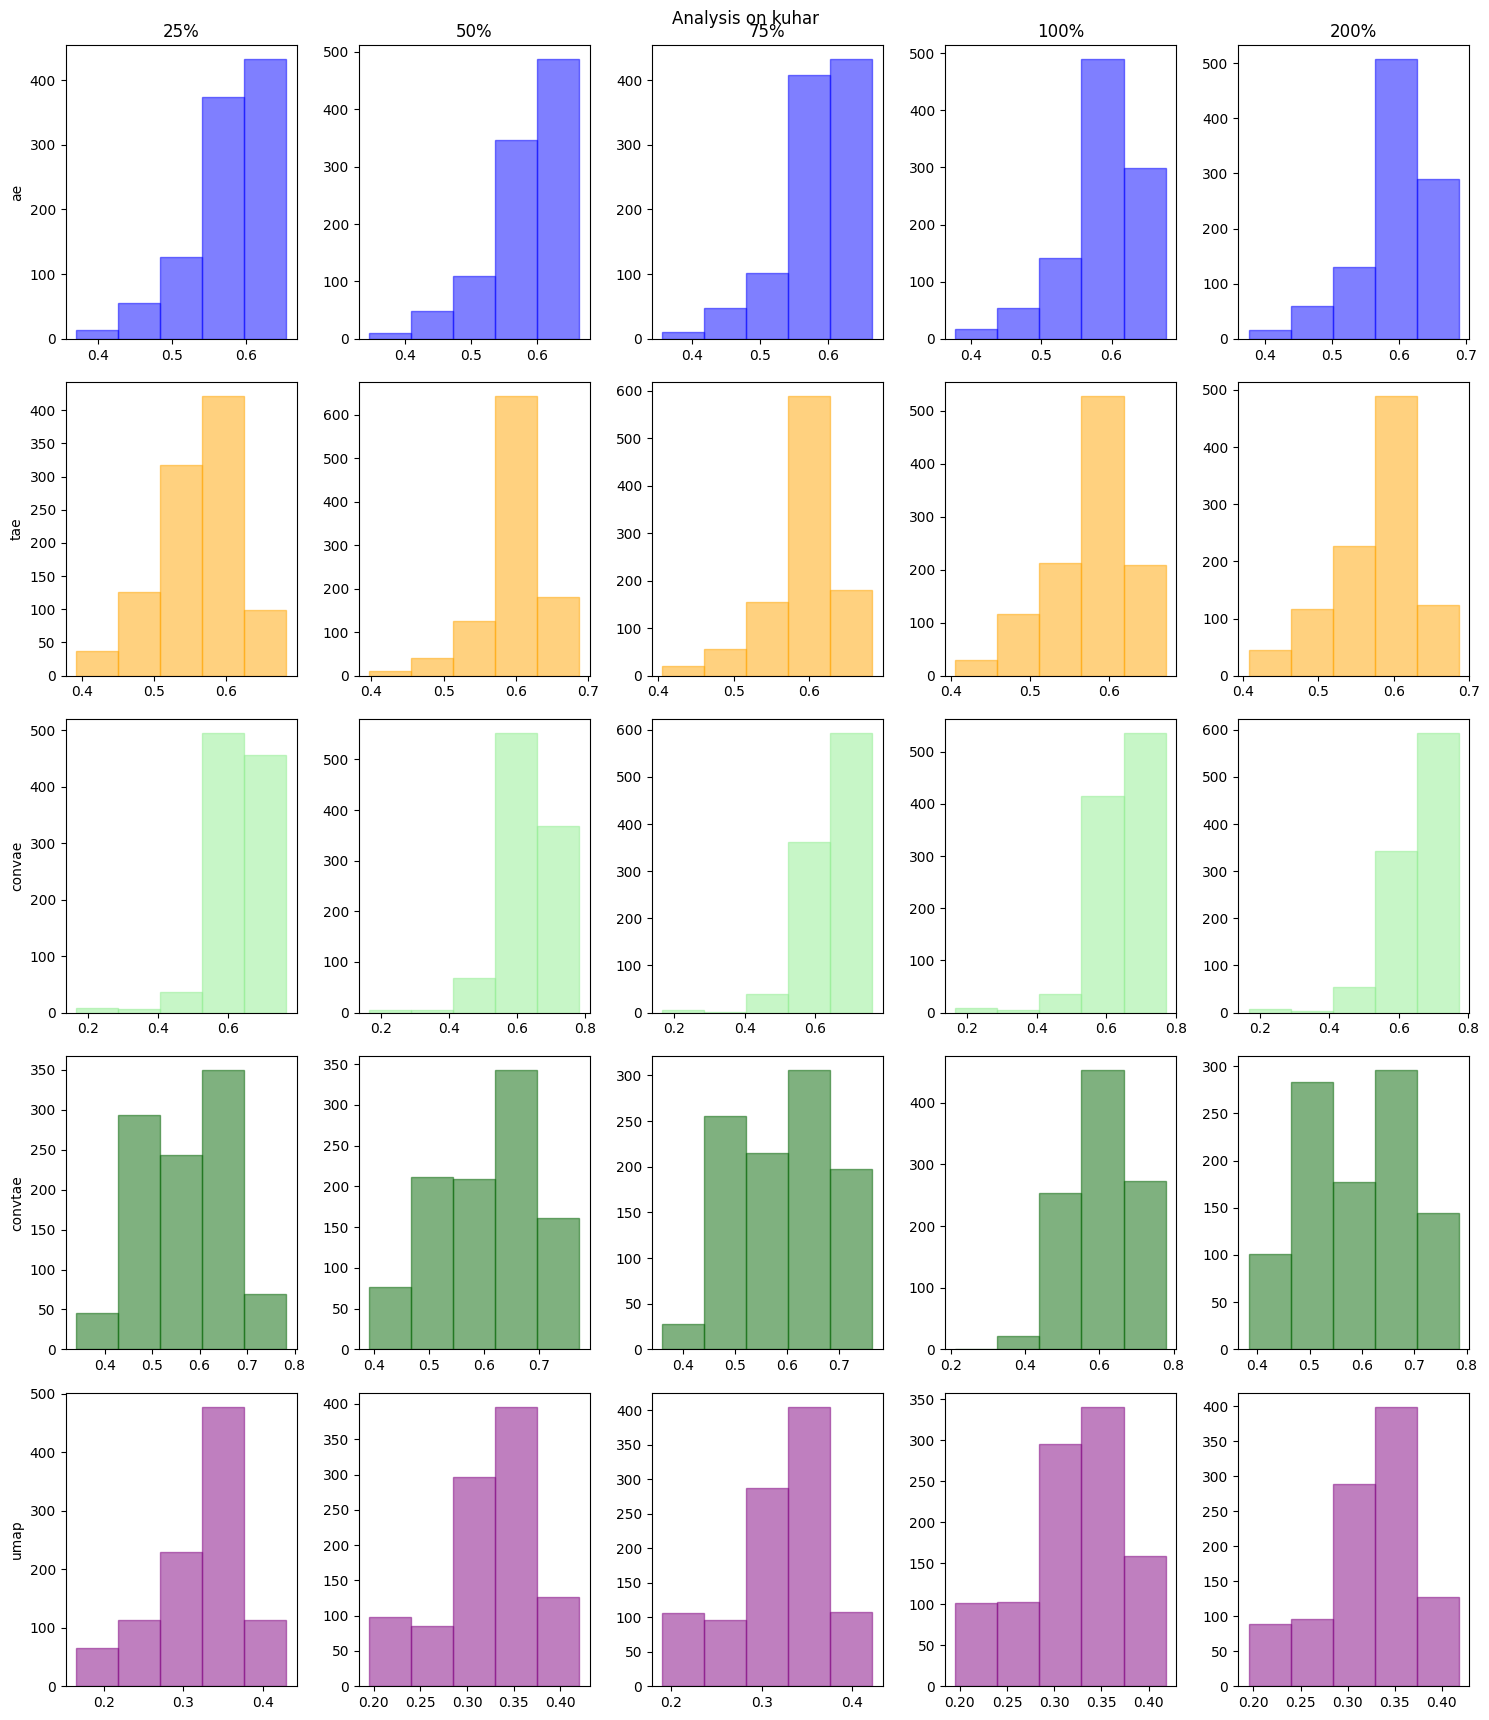

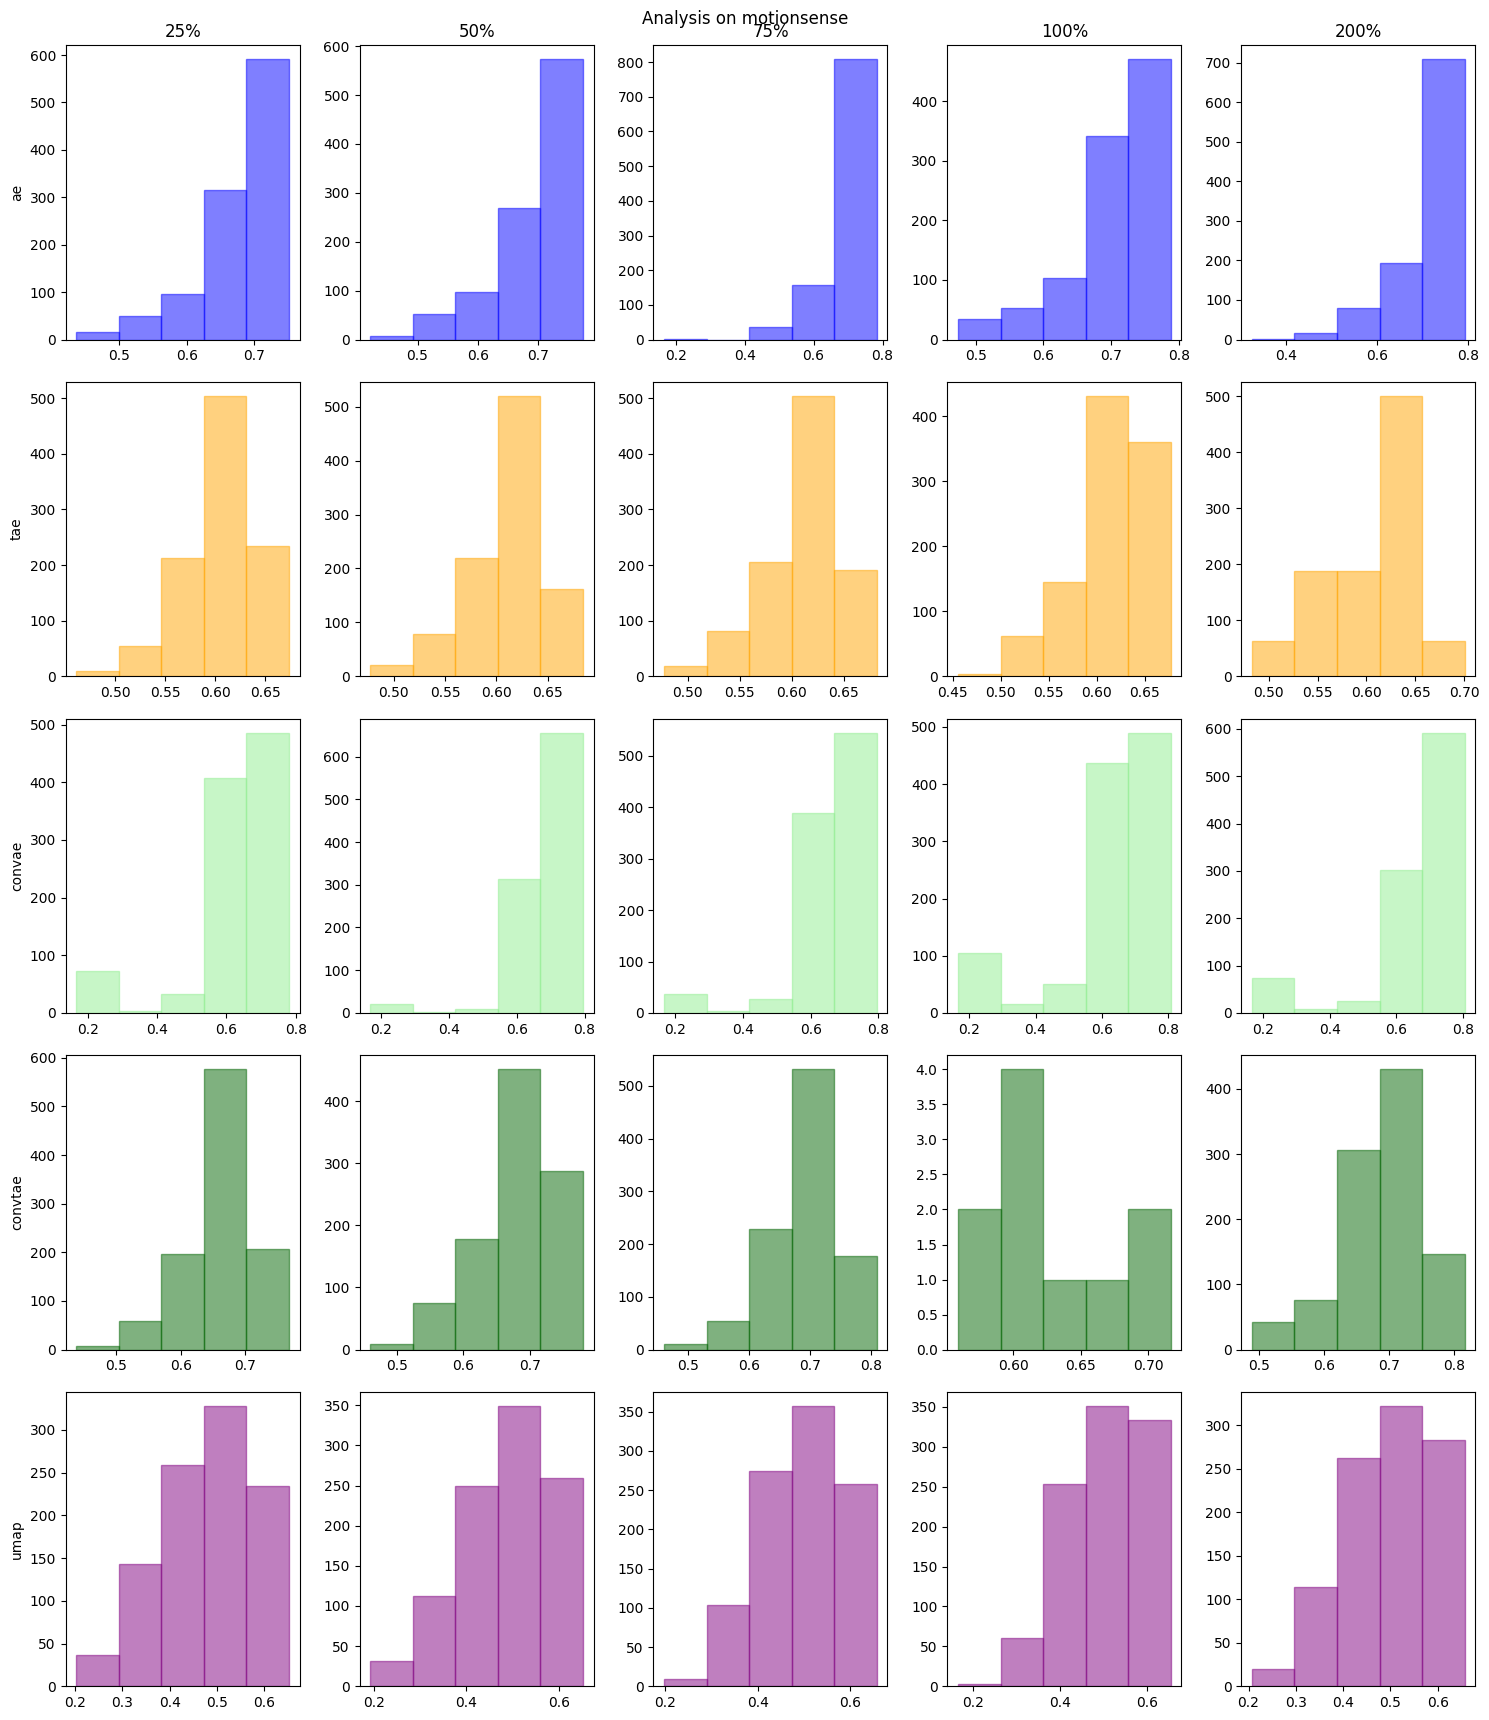

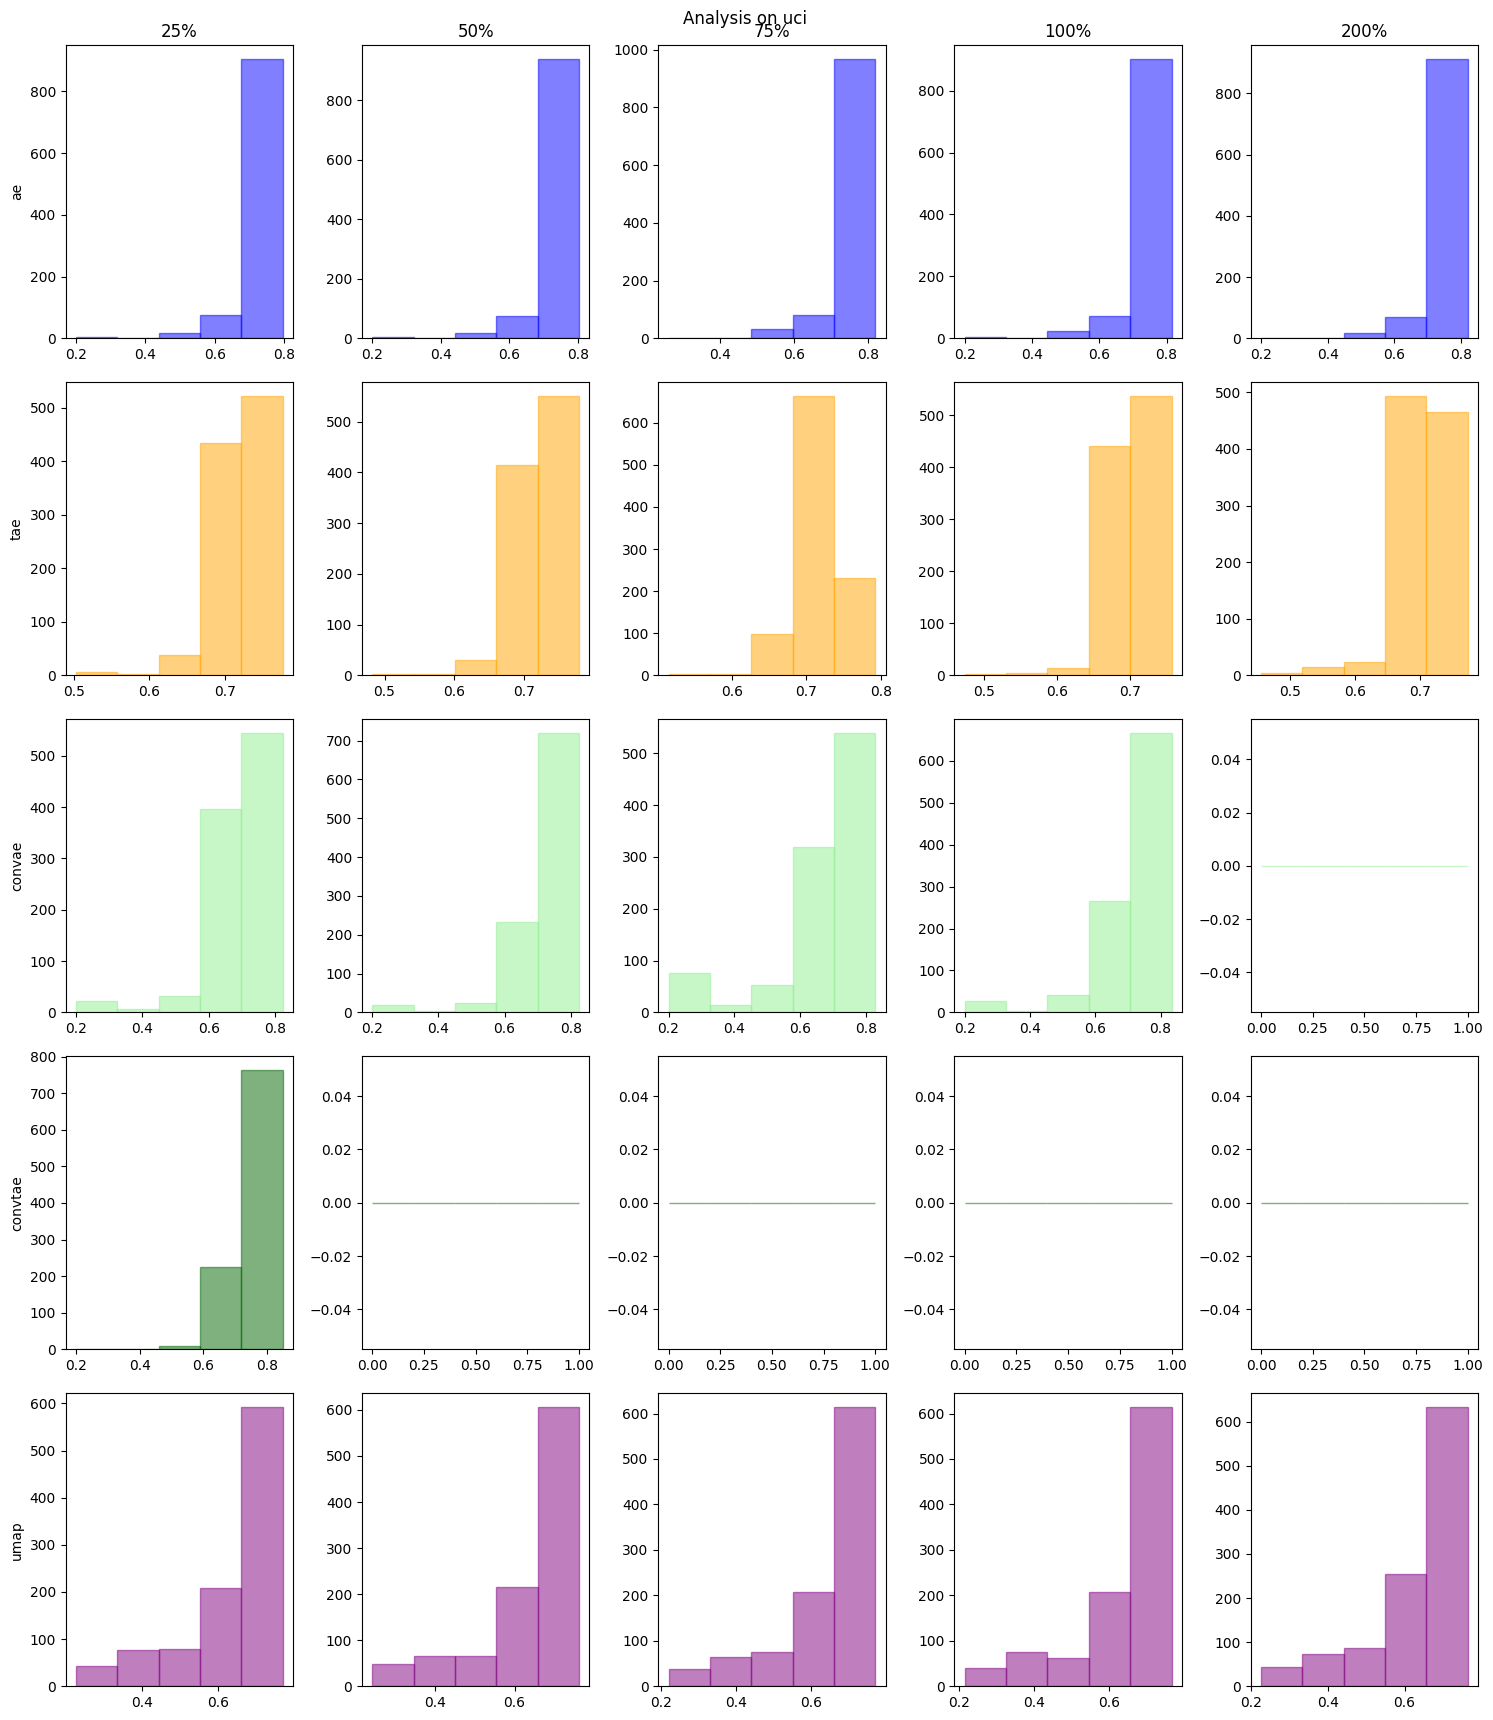

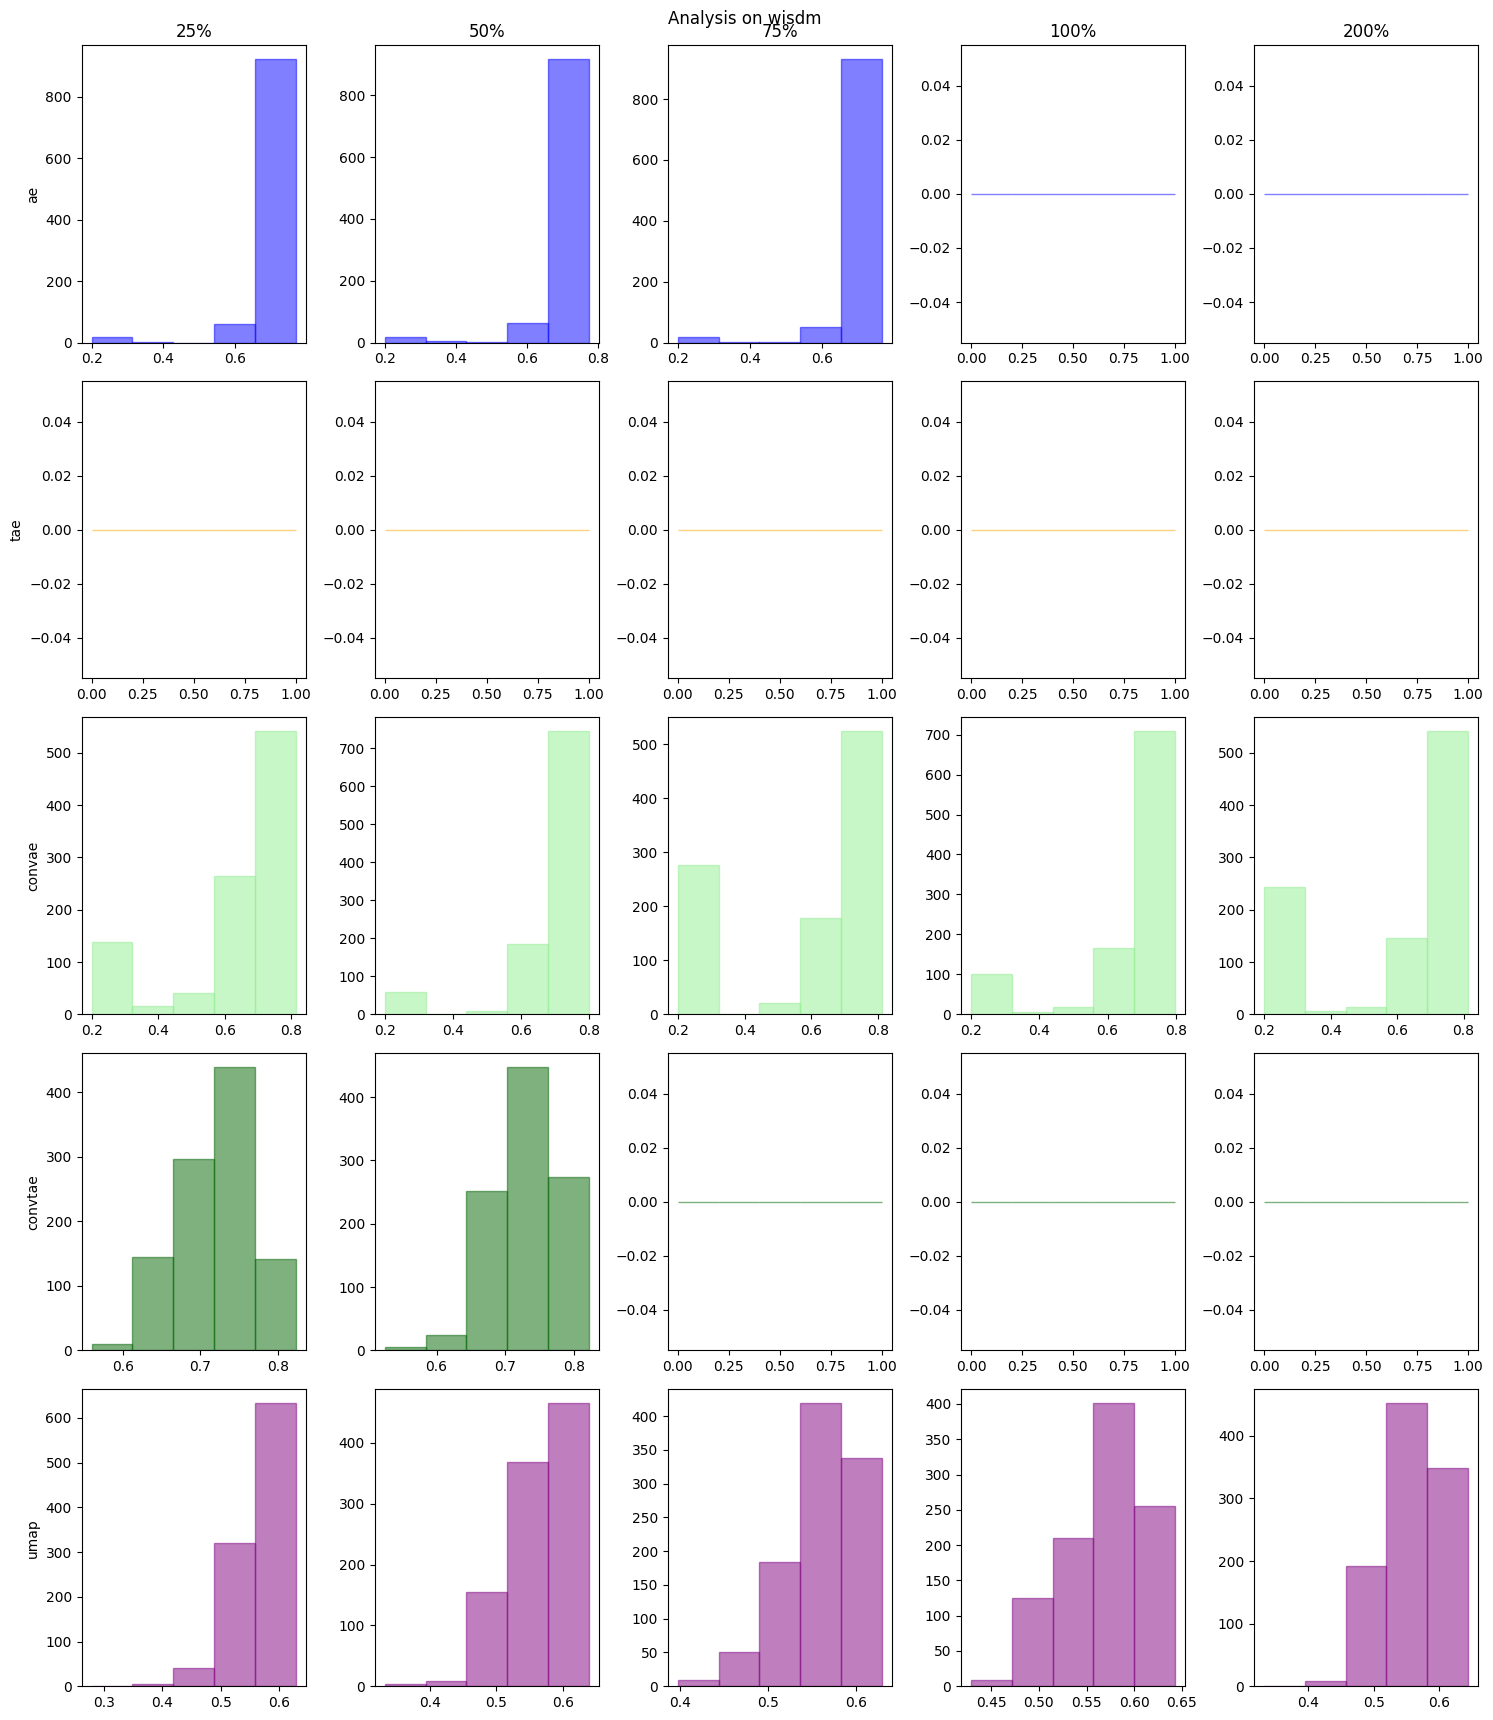

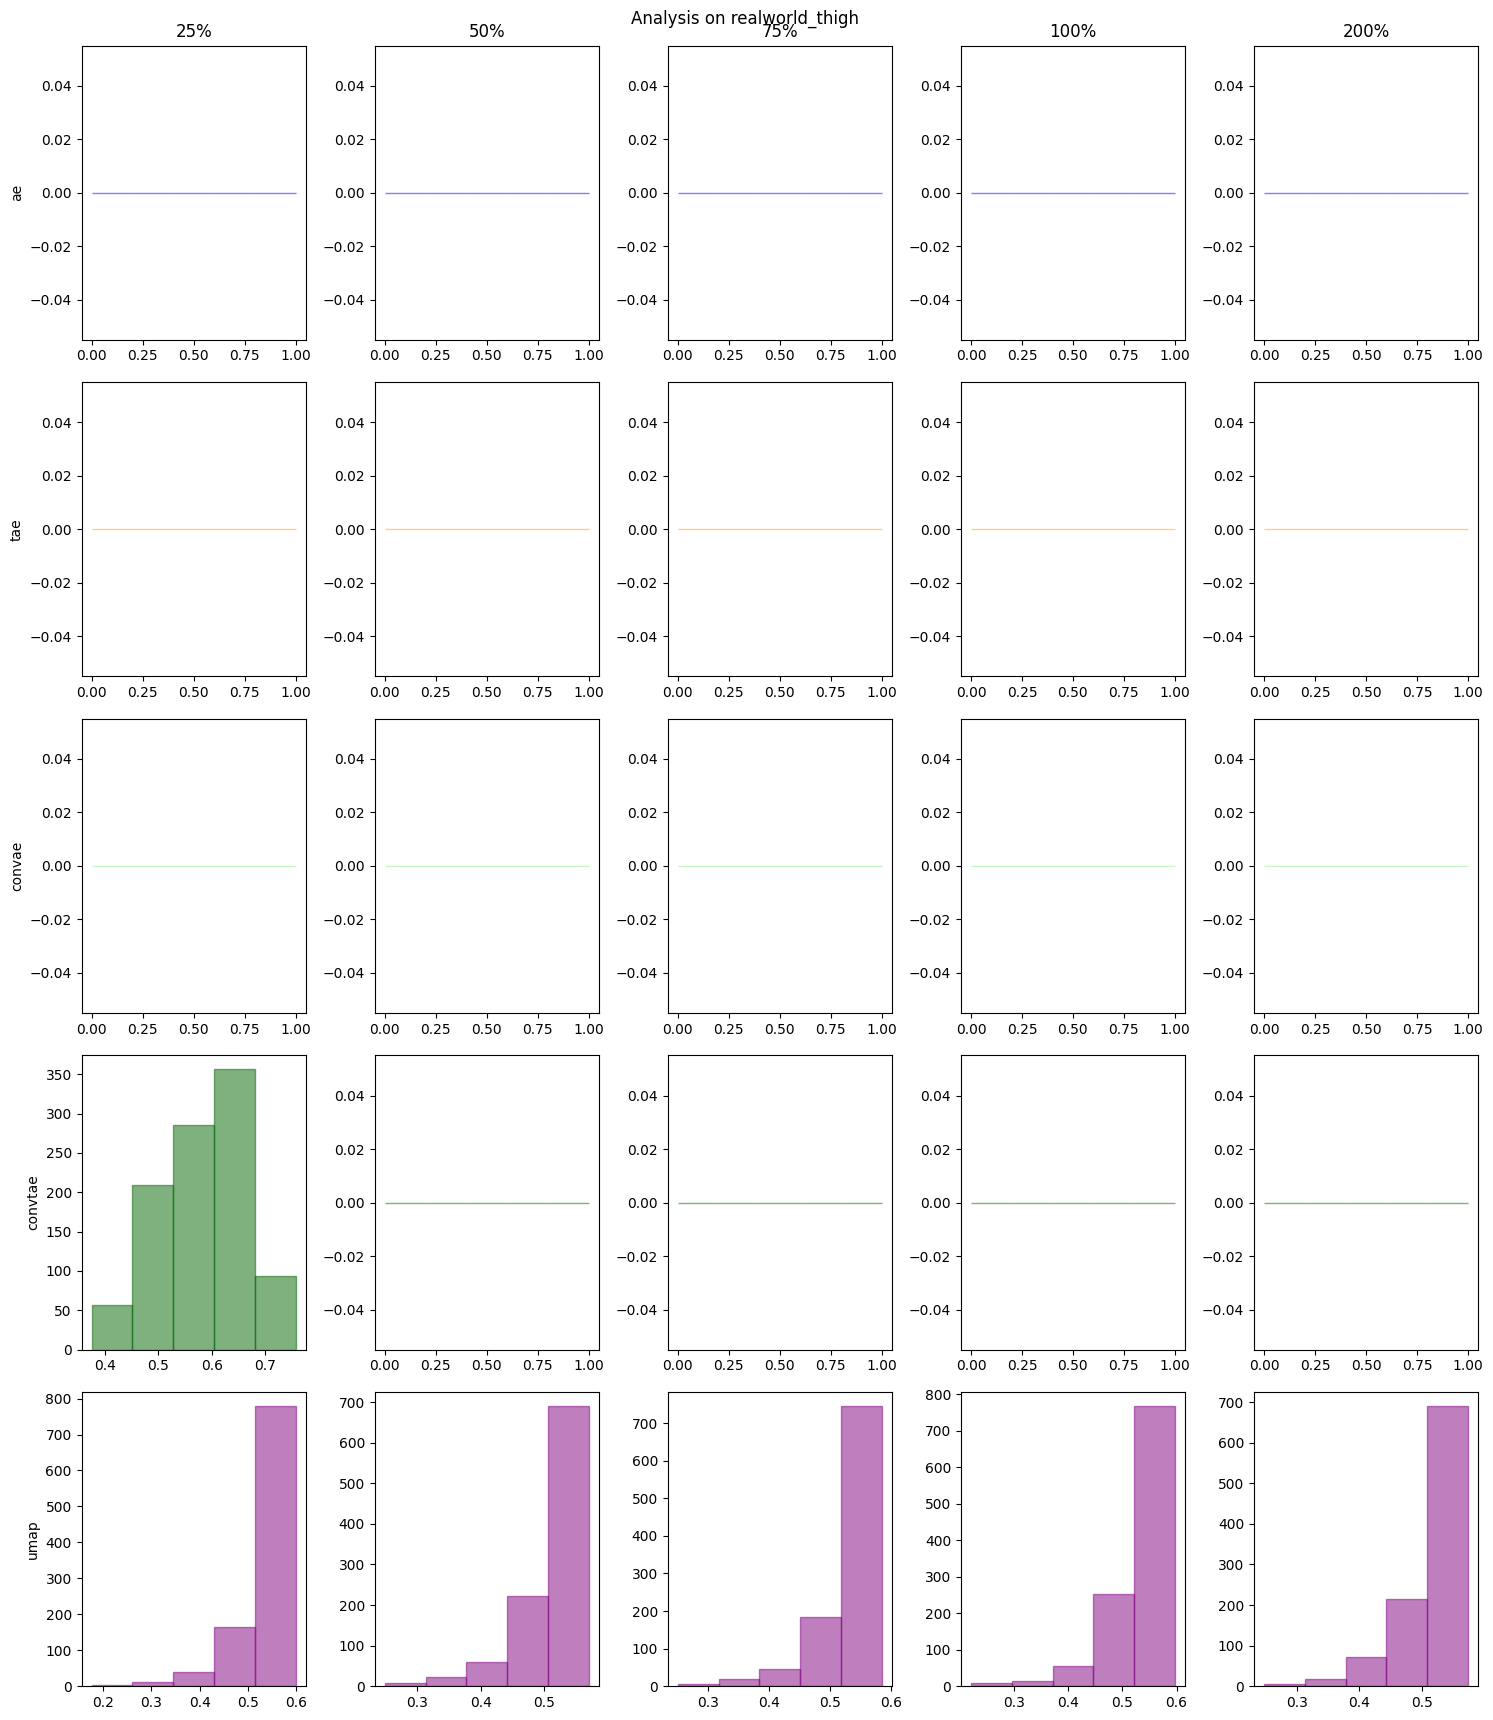

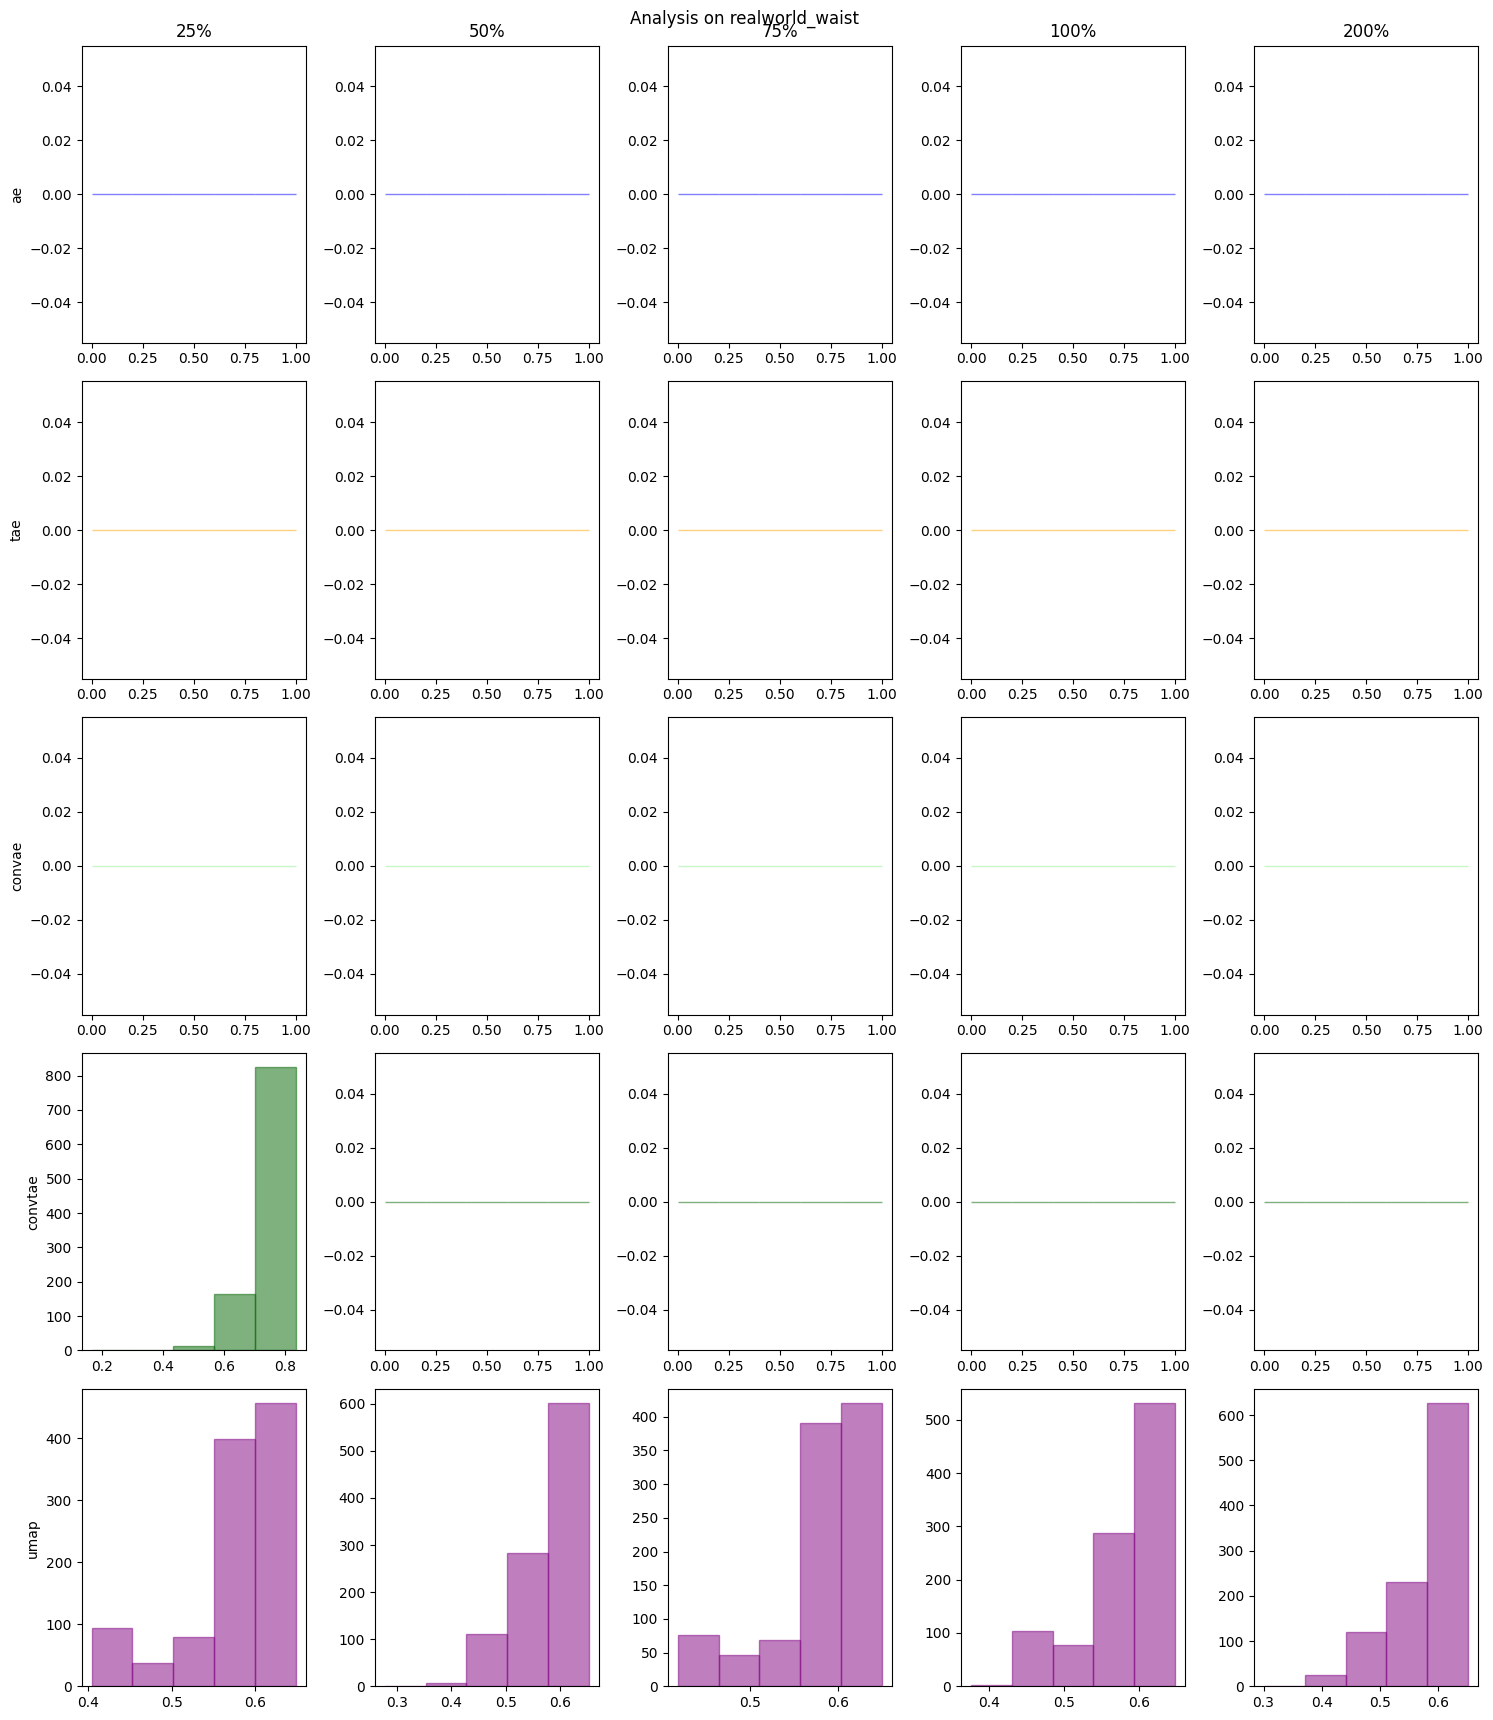

In [105]:
histogramas(datasets=['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist'])